# Healthcare: Project 2 

## IMPORTS

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")
import re
import scipy as sp

## Loading Data

In [2]:
# health care diabetes data.
HCD_data = pd.read_csv("health care diabetes.csv")
HCD_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
HCD_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
HCD_data.shape

(768, 9)

In [5]:
HCD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
HCD_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#Train data.
Train_data = pd.read_csv("train.csv")
Train_data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,F,2015-10-20T08:33:56Z,2015-10-23T00:00:00Z,Friday,No-Show,0,0,0,0,1,0,0,0,-3
1,56,F,2014-02-03T10:05:26Z,2014-02-20T00:00:00Z,Thursday,No-Show,1,0,1,0,0,0,0,1,-17
2,27,F,2014-04-29T07:57:32Z,2014-05-20T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-21
3,24,M,2014-04-02T13:53:37Z,2014-05-06T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-34
4,48,F,2014-01-07T10:07:17Z,2014-01-30T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-23


In [8]:
Train_data.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'ApointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alcoolism', 'HiperTension',
       'Handcap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')

In [9]:
Train_data.shape

(210000, 15)

In [10]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Age                      210000 non-null  int64 
 1   Gender                   210000 non-null  object
 2   AppointmentRegistration  210000 non-null  object
 3   ApointmentData           210000 non-null  object
 4   DayOfTheWeek             210000 non-null  object
 5   Status                   210000 non-null  object
 6   Diabetes                 210000 non-null  int64 
 7   Alcoolism                210000 non-null  int64 
 8   HiperTension             210000 non-null  int64 
 9   Handcap                  210000 non-null  int64 
 10  Smokes                   210000 non-null  int64 
 11  Scholarship              210000 non-null  int64 
 12  Tuberculosis             210000 non-null  int64 
 13  Sms_Reminder             210000 non-null  int64 
 14  AwaitingTime        

In [11]:
Train_data.isna().sum()

Age                        0
Gender                     0
AppointmentRegistration    0
ApointmentData             0
DayOfTheWeek               0
Status                     0
Diabetes                   0
Alcoolism                  0
HiperTension               0
Handcap                    0
Smokes                     0
Scholarship                0
Tuberculosis               0
Sms_Reminder               0
AwaitingTime               0
dtype: int64

In [12]:
# healthcare Appointment data.
Appo_data = pd.read_csv("healthcare appointment data.csv")
Appo_data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [13]:
Appo_data.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'ApointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alcoolism', 'HiperTension',
       'Handcap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')

In [14]:
Appo_data.shape

(300000, 15)

In [15]:
Appo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Age                      300000 non-null  int64 
 1   Gender                   300000 non-null  object
 2   AppointmentRegistration  300000 non-null  object
 3   ApointmentData           300000 non-null  object
 4   DayOfTheWeek             300000 non-null  object
 5   Status                   300000 non-null  object
 6   Diabetes                 300000 non-null  int64 
 7   Alcoolism                300000 non-null  int64 
 8   HiperTension             300000 non-null  int64 
 9   Handcap                  300000 non-null  int64 
 10  Smokes                   300000 non-null  int64 
 11  Scholarship              300000 non-null  int64 
 12  Tuberculosis             300000 non-null  int64 
 13  Sms_Reminder             300000 non-null  int64 
 14  AwaitingTime        

In [16]:
Appo_data.isna().sum()

Age                        0
Gender                     0
AppointmentRegistration    0
ApointmentData             0
DayOfTheWeek               0
Status                     0
Diabetes                   0
Alcoolism                  0
HiperTension               0
Handcap                    0
Smokes                     0
Scholarship                0
Tuberculosis               0
Sms_Reminder               0
AwaitingTime               0
dtype: int64

## Project Task: Week 1
## Data Exploration:

### 1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
### Glucose,
### BloodPressure,
### SkinThickness,
### Insulin,
### BMI,

In [17]:
HCD_data
# 0 is a missing value which is a problem.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
HCD_data.isin(['0']).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [19]:
HCD_copy = HCD_data.copy(deep=True)
HCD_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = HCD_copy[['Glucose','BloodPressure',
'SkinThickness','Insulin','BMI']].replace(0,np.NaN)
# Using statistical inference.
# Replacing NaN value by mean, median depending upon distribution.

# Glucose MEAN()
HCD_copy['Glucose'].fillna(HCD_copy['Glucose'].mean(), inplace=True)
# BloodPressure MEAN()
HCD_copy['BloodPressure'].fillna(HCD_copy['BloodPressure'].mean(), inplace=True)
# SkinThickness MEDIAN() VERY HIGH No. of 0's
HCD_copy['SkinThickness'].fillna(HCD_copy['SkinThickness'].median(), inplace=True)
# Insulin MEDIAN() VERY HIGH No. of 0's
HCD_copy['Insulin'].fillna(HCD_copy['Insulin'].median(), inplace=True)
# BMI MEDIAN() This parameter varies person to person by a lot so mean cannot be taken.
HCD_copy['BMI'].fillna(HCD_copy['BMI'].median(), inplace=True)

In [20]:
HCD_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [21]:
HCD_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2. Visually explore these variables using histograms. Treat the missing values accordingly.

In [22]:
HCD_copy.isna().sum()
# NO NAN values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
HCD_copy.isin(['0']).sum(axis=0)
# Ignore Pregnancies and Outcome.

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B47373F88>,
      dtype=object)

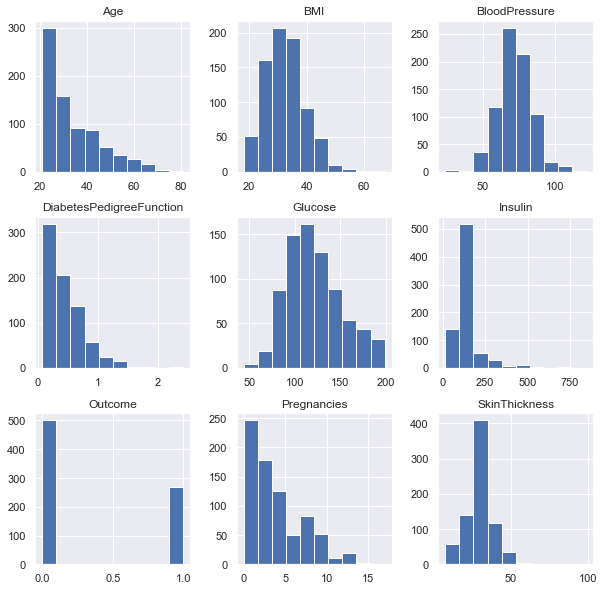

In [24]:
HCD_copy.hist(figsize=(10,10))

### 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [25]:
HCD_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Project Task: Week 2
## Data Exploration:
 

### 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

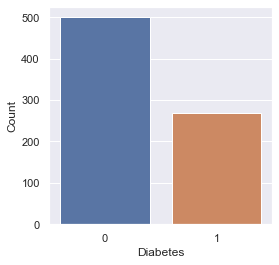

In [26]:
plt.figure(figsize=(4,4))
sns.countplot(x='Outcome', data=HCD_copy)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

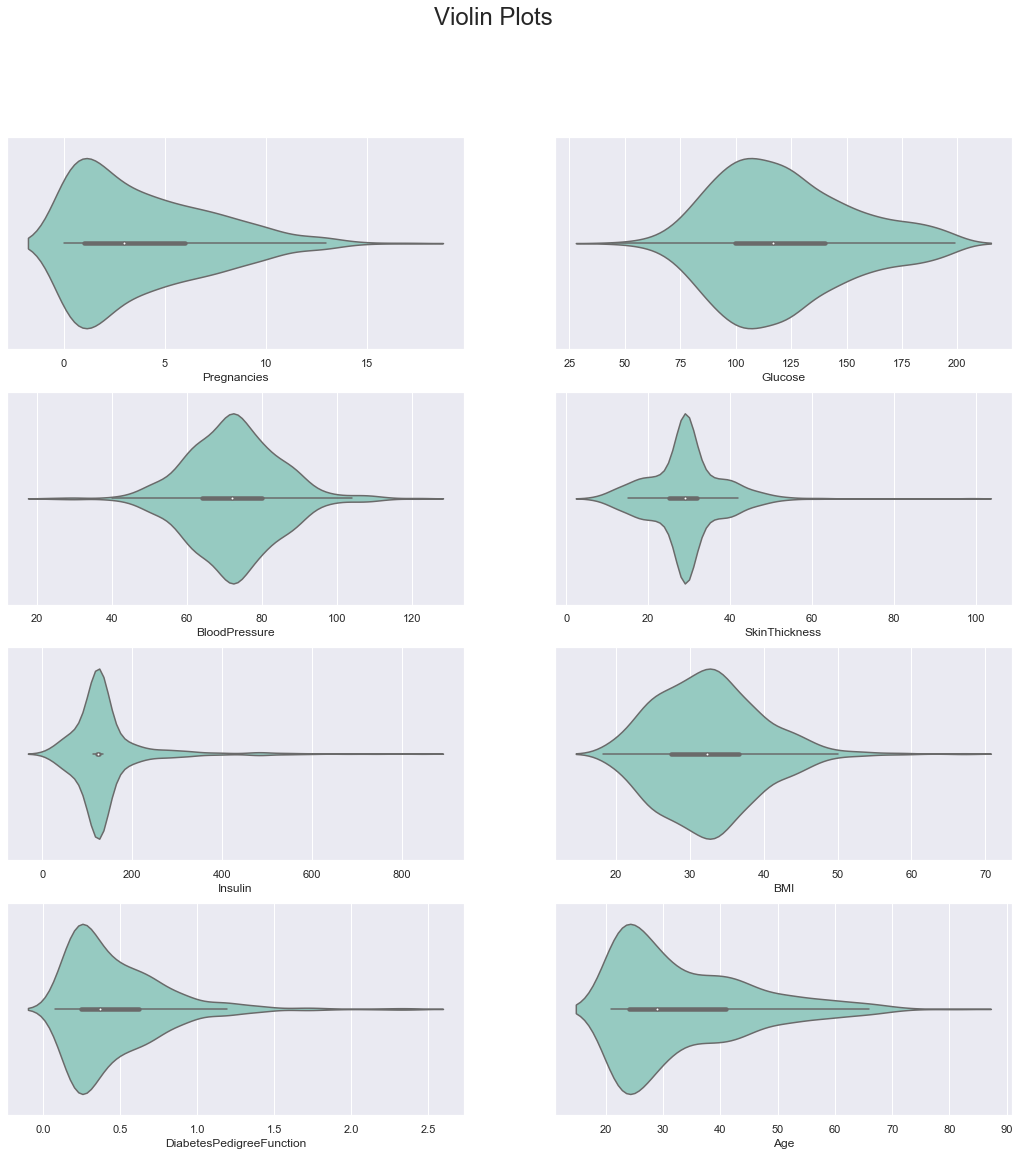

In [27]:
# Understanding the distribution of each column.
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18))
plt.suptitle('Violin Plots',fontsize=24)
sns.violinplot(x="Pregnancies", data=HCD_copy,ax=ax[0,0],palette='Set3')
sns.violinplot(x="Glucose", data=HCD_copy,ax=ax[0,1],palette='Set3')
sns.violinplot (x ='BloodPressure', data=HCD_copy, ax=ax[1,0], palette='Set3')
sns.violinplot(x='SkinThickness', data=HCD_copy, ax=ax[1,1],palette='Set3')
sns.violinplot(x='Insulin', data=HCD_copy, ax=ax[2,0], palette='Set3')
sns.violinplot(x='BMI', data=HCD_copy, ax=ax[2,1],palette='Set3')
sns.violinplot(x='DiabetesPedigreeFunction', data=HCD_copy, ax=ax[3,0],palette='Set3')
sns.violinplot(x='Age', data=HCD_copy, ax=ax[3,1],palette='Set3')
plt.show()

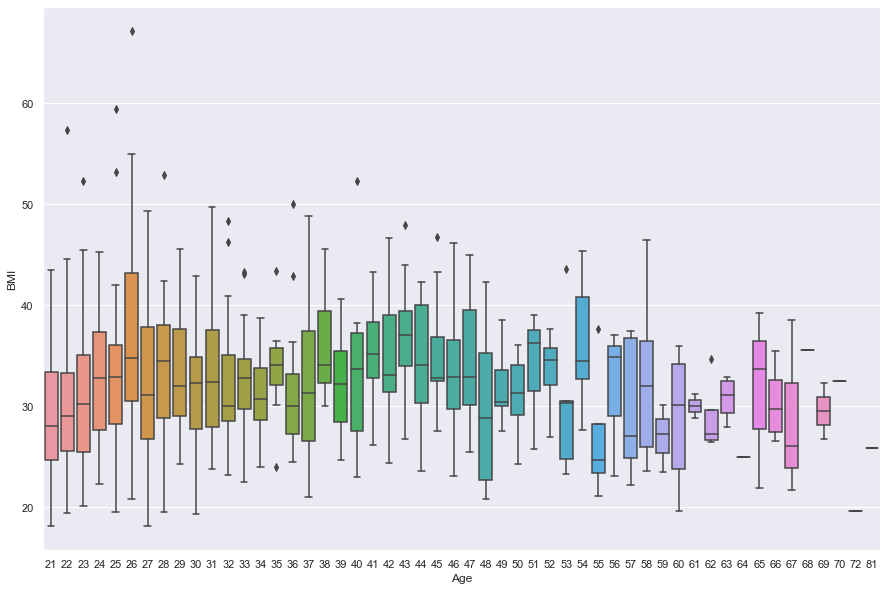

In [28]:
plt.subplots(figsize=(15,10))
sns.boxplot(x='Age', y='BMI', data=HCD_copy)

### 2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

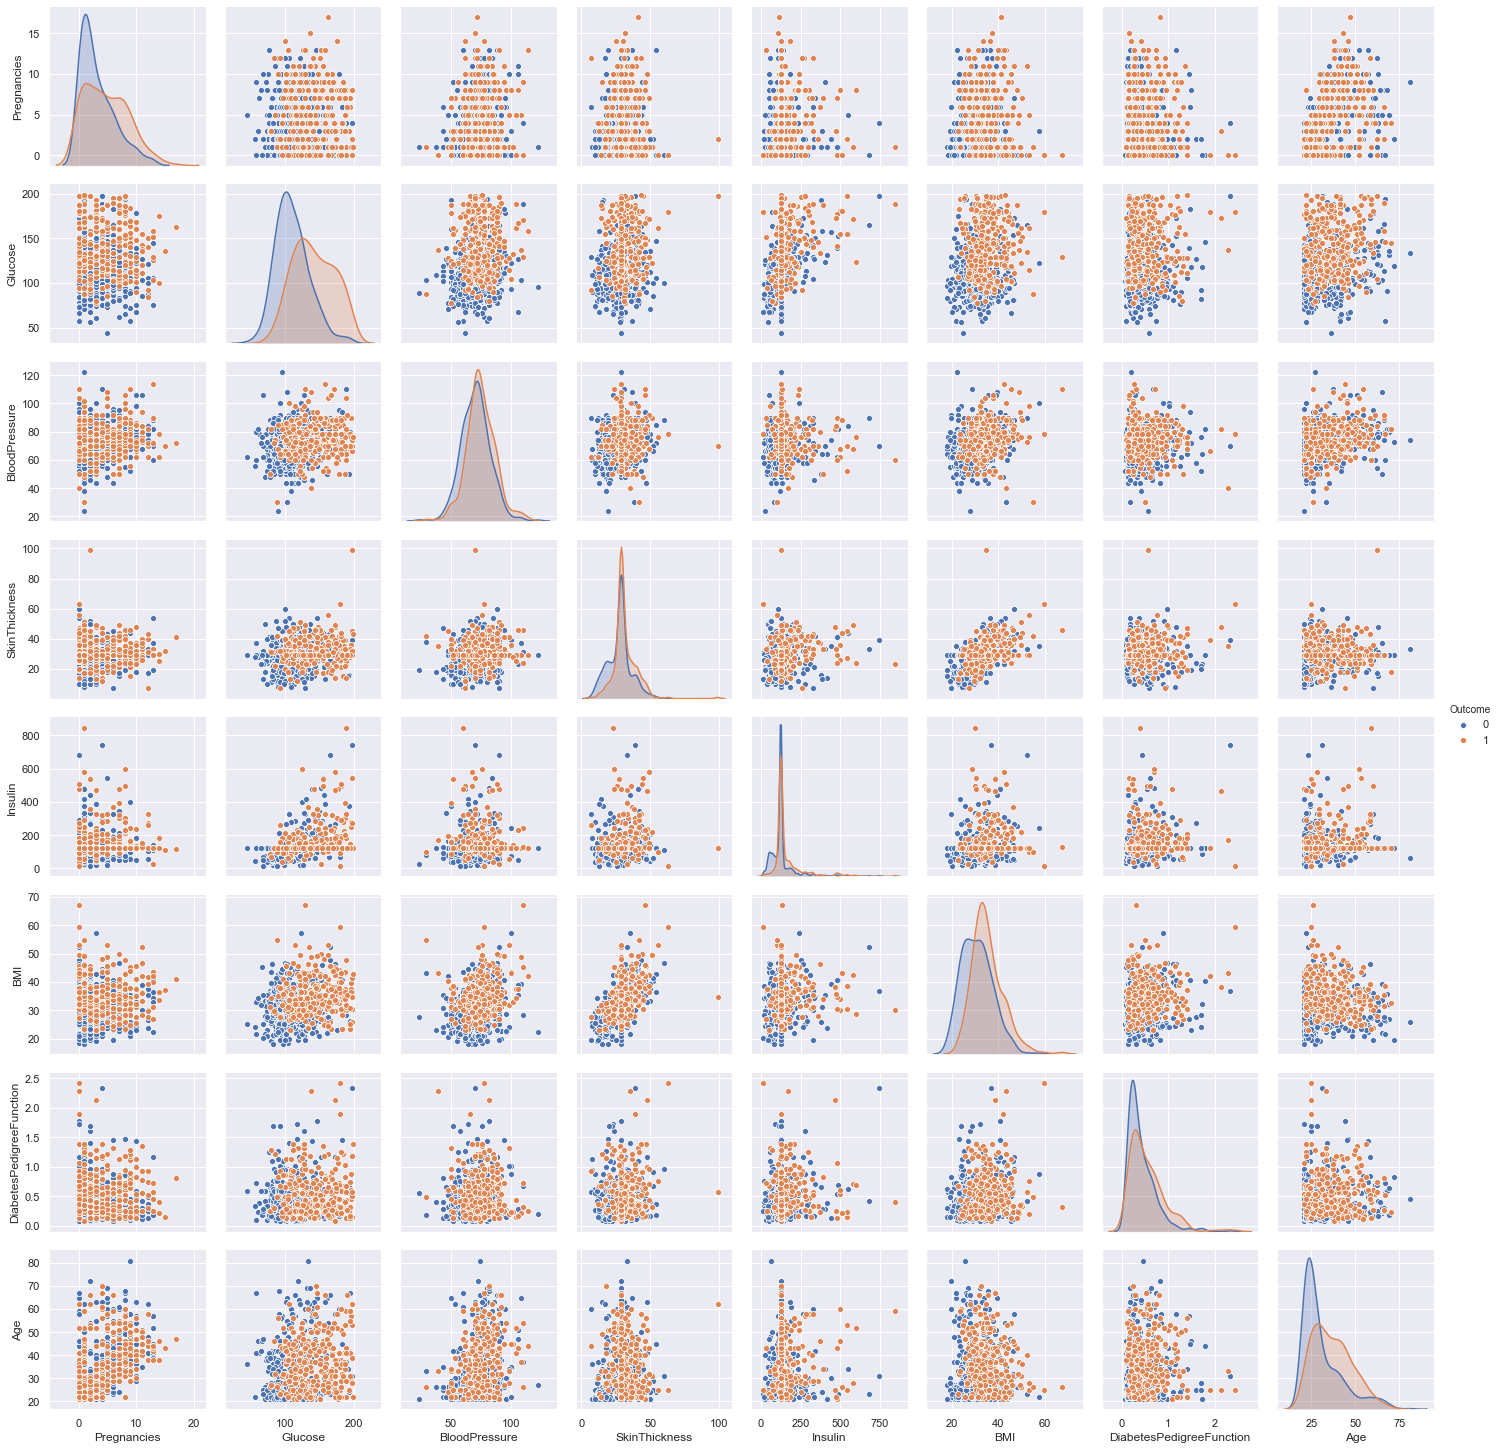

In [29]:
sns.pairplot(data = HCD_copy, hue ='Outcome')

### 3. Perform correlation analysis. Visually explore it using a heat map.

In [30]:
corr = HCD_copy.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


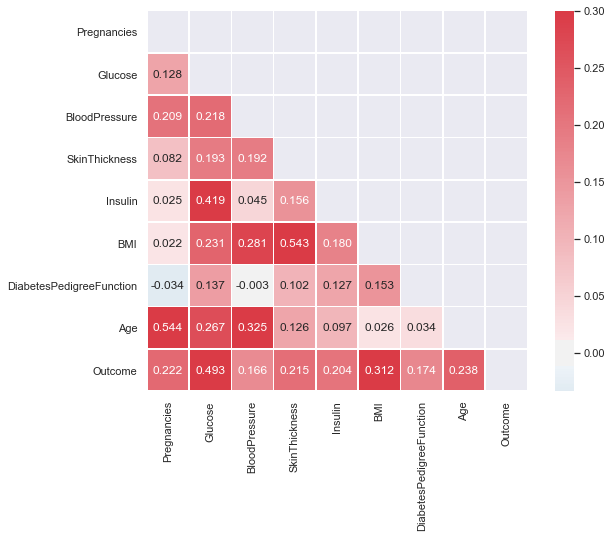

In [31]:
f,ax = plt.subplots(figsize=(10, 7))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, fmt= '.3f',ax=ax)
plt.show()

## Project Task: Week 3
## Data Modeling:

In [41]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

In [33]:
X = HCD_copy.iloc[:, :-1]
y = HCD_copy.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### I decided to use these model algorithms
1. Logistic Regression
2. Decision Tree
3. Gradient Boosting


#### MY REASONING : LOGISTIC REGRESSION
1. Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary. Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Accuracy  78.64583333333334
Average precision-recall score: 0.68


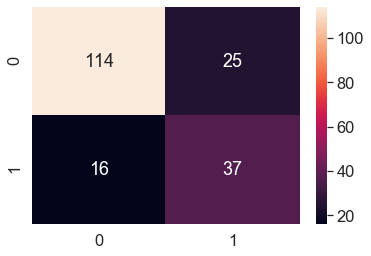

In [43]:
#Model
LR = LogisticRegression()

#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
log_score = LR.score(X_test, y_test)*100
print("Accuracy ", LR.score(X_test, y_test)*100)

# Precision
log_y_score = LR.decision_function(X_test)
log_average_precision = average_precision_score(y_test, log_y_score)
print('Average precision-recall score: {0:0.2f}'.format(log_average_precision))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

#### MY REASONING : Decision Tree
2. Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

Accuracy  76.5625


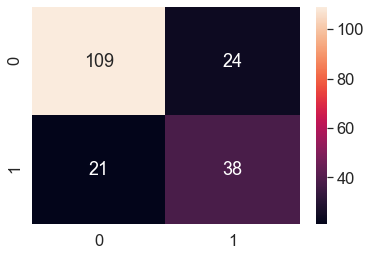

In [45]:
#Model
DT = DecisionTreeClassifier()

#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
DT_score = DT.score(X_test, y_test)*100
print("Accuracy ", DT_score)

# Precision
# DT_y_score = DT.decision_function(X_test)
#DT_average_precision = average_precision_score(y_test, DT_y_score)
#print('Average precision-recall score: {0:0.2f}'.format(DT_average_precision))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

#### MY REASONING : Gradient Boosting
3. Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

Accuracy  81.25


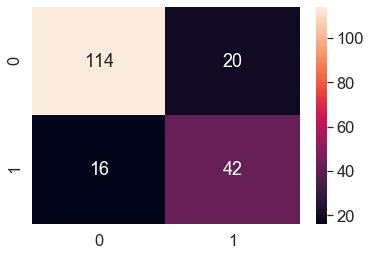

In [36]:
#Model
model = GradientBoostingClassifier()

#fiting the model
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#Accuracy
gbx_score = model.score(X_test, y_test)*100 
print("Accuracy ",gbx_score)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

### 2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

Accuracy  74.47916666666666


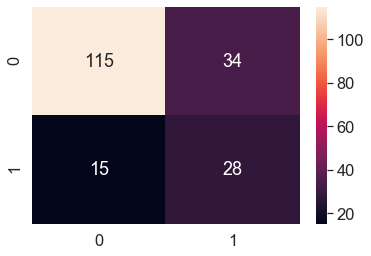

In [47]:
from sklearn.neighbors import KNeighborsClassifier
#Model KNN
knn = KNeighborsClassifier( n_neighbors=4)

#fiting the model
knn.fit(X_train, y_train)

#prediction
y_pred1 = knn.predict(X_test)

#Accuracy
knn_score =  knn.score(X_test, y_test)*100
print("Accuracy ", knn_score)

# Precision
# knn_y_score = knn.decision_function(X_test)
# knn_average_precision = average_precision_score(y_test, knn_y_score)
# print('Average precision-recall score: {0:0.2f}'.format(knn_average_precision))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred1, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

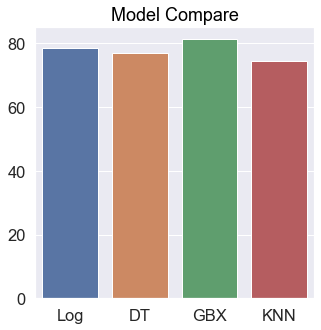

In [38]:
indexx = ["Log","DT","GBX","KNN"]
regressions = [log_score,DT_score,gbx_score,knn_score]
plt.figure(figsize=(5,5))
sns.barplot(x=indexx,y=regressions)
plt.xticks()
plt.title('Model Compare',color = 'black',fontsize=18)
plt.show()

## Project Task: Week 4

## Data Modeling:

### 1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [39]:
# Bagging ensembles
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 42), n_estimators = 500,
                            max_samples = 100, bootstrap = True, n_jobs = 1, random_state = 42)
bag_clf.fit(X_train, y_train)

# determine accuracy score for the bagging method
bag_y_pred = bag_clf.predict(X_test)
bag_score = accuracy_score(y_test, bag_y_pred)

# standard decision tree classifier
tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)

# determine accuracy score for the Decision Tree method
tree_y_pred = tree_clf.predict(X_test)
tree_score = accuracy_score(y_test, tree_y_pred)

# Random Forests
rf_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1, random_state = 42)
rf_clf.fit(X_train, y_train)

# determine accuracy score for Random Forest method
rf_y_pred = rf_clf.predict(X_test)
rf_score = accuracy_score(y_test, rf_y_pred)

# Ada Boost Classifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators = 200, 
                             algorithm = "SAMME.R", learning_rate = 0.5, random_state = 42)
ada_clf.fit(X_train, y_train)

# determine accuracy score for Ada Boost Classifier
ada_y_pred = ada_clf.predict(X_test)
ada_score = accuracy_score(y_test, ada_y_pred)

# summary for all the results
print('Accuracy Score Results')
print('Bagging Classifier {:.2f}'.format(bag_score))
print('Decision Tree Classifier {:.2f}'.format(tree_score))
print('Random Forest {:.2f}'.format(rf_score))
print('Ada Boost Classifier {:.2f}'.format(ada_score))

Accuracy Score Results
Bagging Classifier 0.77
Decision Tree Classifier 0.78
Random Forest 0.77
Ada Boost Classifier 0.78


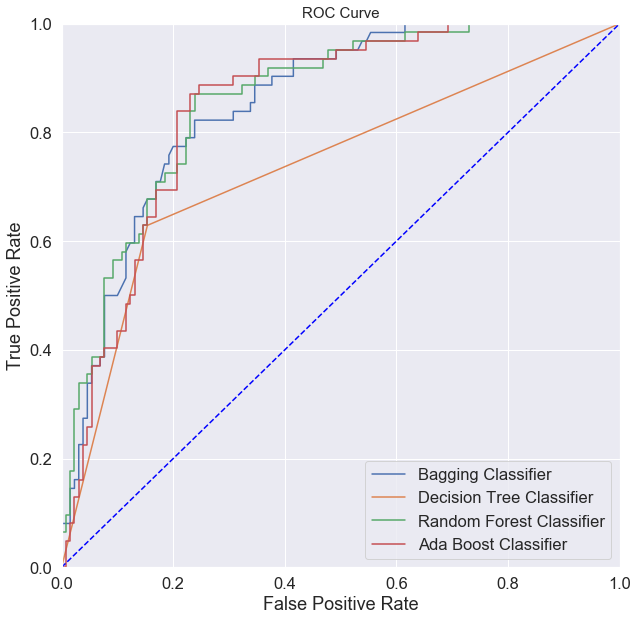

In [40]:
# determine accuracy score for all methods
bag_y_prob = bag_clf.predict_proba(X_test)
bag_y_score = bag_y_prob[:, 1]
bag_fpr, bag_tpr, bag_threshold = roc_curve(y_test, bag_y_score)

tree_y_prob = tree_clf.predict_proba(X_test)
tree_y_score = tree_y_prob[:, 1]
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_y_score)

rf_y_prob = rf_clf.predict_proba(X_test)
rf_y_score = rf_y_prob[:, 1]
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_y_score)

ada_y_prob = ada_clf.predict_proba(X_test)
ada_y_score = ada_y_prob[:, 1]
ada_fpr, ada_tpr, ada_threshold = roc_curve(y_test, ada_y_score)

# plotting ROC Curve to visualize all method
plt.figure(figsize = (10, 10))
plt.plot(bag_fpr, bag_tpr, label = 'Bagging Classifier')
plt.plot(tree_fpr, tree_tpr, label = 'Decision Tree Classifier')
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest Classifier')
plt.plot(ada_fpr, ada_tpr, label = 'Ada Boost Classifier')

plt.plot([0, 1], [0, 1], color = 'blue', linestyle = '--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize = 15)
plt.legend(loc = "lower right")
plt.show()

## Data Reporting: TABLEAU

### 2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

### a. Pie chart to describe the diabetic or non-diabetic population

### b. Scatter charts between relevant variables to analyze the relationships

### c. Histogram or frequency charts to analyze the distribution of the data

### d. Heatmap of correlation analysis among the relevant variables

### e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

# TABLEAU LINK